## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [9]:
# answer goes here
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,...,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,...,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,...,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,...,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,...,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0,0,0,0,0,1,-2,-1,-1,3,3,2,1,1,1,8,3,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,4,3,3,1,3,3,3,3,3,3,3,3,...,-2,65,75,2,1,0,0,0,0,2,0,1,0,1,0,0,0,0,0,-2,0,5,2,4,2,3,1,5,7,1,1,2,4,0,0,1,0,4,1,4.260668


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [10]:
# answer goes here
X = df.filter(like='score', axis=1)

X.head()

,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [11]:
# answer goes here
scale = StandardScaler()
X_scale = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scale.head()

,FWBscore,FSscore,LMscore,KHscore
0,-0.073062,-0.530906,0.653830,1.624716
1,-0.355677,-0.609920,0.653830,-0.629626
2,-0.496984,-0.688935,0.653830,-0.160841
3,-0.496984,-0.688935,-0.670399,-1.752502
4,-0.496984,-0.688935,-1.994628,-2.261785


Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [21]:
# answer goes here
inertia = []
silhouette = []
k_range = range(2,31)

for k in k_range:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)
    inertia.append(k_means.inertia_)
    pred = k_means.predict(df)
    silhouette.append(silhouette_score(df, pred, metric='euclidean'))    

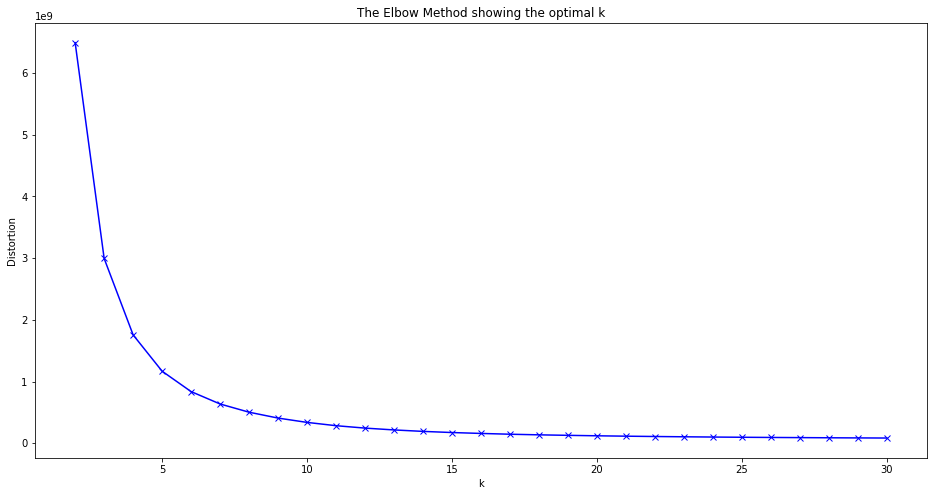

In [22]:
plt.figure(figsize=(16,8))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow seems to bend around k of 3 or 4, but it is a bit smoothed out. 

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

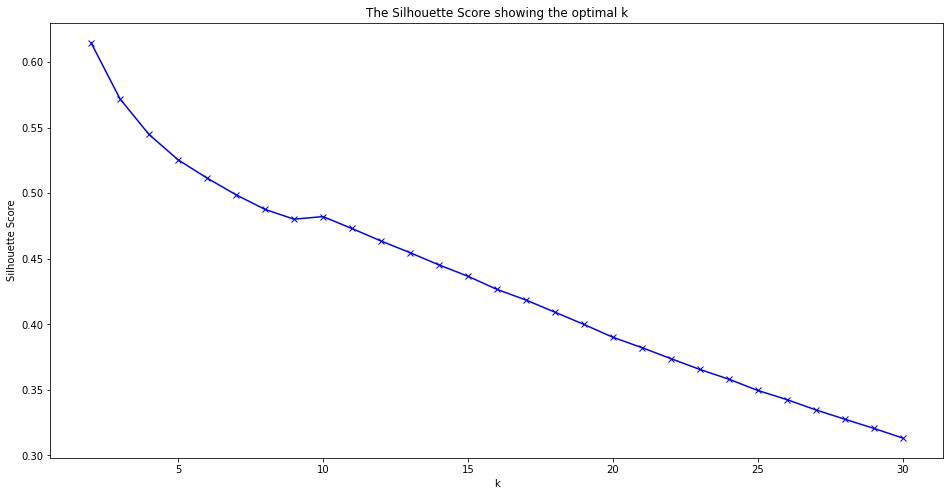

In [24]:
plt.figure(figsize=(16,8))
plt.plot(k_range, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Score showing the optimal k')
plt.show()

Opitmal Silhouette score seems to be around k=2. This is a little different than what the Elbow method suggested (k of 3 or 4). 